<a href="https://colab.research.google.com/github/Mahya-gh/Persian-Characters-Recognition/blob/main/main_cnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ***model***

In [ ]:
# jABBARI
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
## jABBARI

train_path = "/content/drive/MyDrive/license_plate_detection/new_data/train"
valid_path = "/content/drive/MyDrive/license_plate_detection/new_data/valid"
test_path = "/content/drive/MyDrive/license_plate_detection/new_data/test"

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),  # Resize images
    batch_size=512,
    class_mode='sparse'  # Use 'sparse' for sparse labels
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(64, 64),
    batch_size=512 ,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=512,
    class_mode='sparse'
)


Found 30291 images belonging to 42 classes.
Found 430 images belonging to 42 classes.
Found 522 images belonging to 41 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(42, activation='softmax')  # 42 classes
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,  # Adjust epochs as needed
    validation_data=valid_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 7304s 109s/step - accuracy: 0.1159 - loss: 3.3092 - val_accuracy: 0.2628 - val_loss: 2.8923
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 438s 7s/step - accuracy: 0.3523 - loss: 2.3487 - val_accuracy: 0.3116 - val_loss: 2.5993
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 449s 7s/step - accuracy: 0.4601 - loss: 1.9397 - val_accuracy: 0.3721 - val_loss: 2.4081
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 498s 7s/step - accuracy: 0.4992 - loss: 1.7904 - val_accuracy: 0.3977 - val_loss: 2.2864
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 452s 7s/step - accuracy: 0.5342 - loss: 1.6528 - val_accuracy: 0.4186 - val_loss: 2.1382
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 498s 7s/step - accuracy: 0.5557 - loss: 1.5688 - val_accuracy: 0.4860 - val_loss: 1.9564
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 500s 7s/step - accuracy: 0.5660 - loss: 1.5106 - val_accuracy: 0.4767 - val_loss: 1.8449
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 500s 7s/step - accuracy: 0.5912 - loss: 1.4181 - val_accuracy: 0.5163 - val_loss:

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4531 - loss: 2.9360
Test accuracy: 0.4521072804927826
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step


<Axes: >

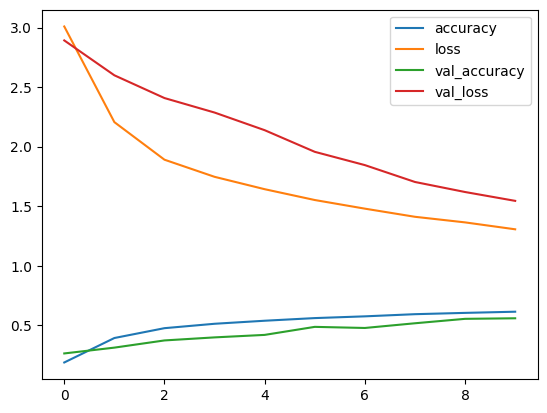

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()